<a href="https://colab.research.google.com/github/dcm5455/dcm5455/blob/main/Stock_Market_Prediction_%26_Forecasting_Using_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraies

# **LETS GROW MORE**
Task 2:- Stock Market Prediction & Forecasting using Stacked LSTM (BeginnerLevel)

Author : Dhruvil Patel

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
key=""
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Loading Data

In [ ]:
data= pd.read_csv('NSE-TATAGLOBAL.csv')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
data.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
data.describe

<bound method NDFrame.describe of             Date    Open    High  ...   Close  Total Trade Quantity  Turnover (Lacs)
0     2018-09-28  234.05  235.95  ...  233.75               3069914          7162.35
1     2018-09-27  234.55  236.80  ...  233.25               5082859         11859.95
2     2018-09-26  240.00  240.00  ...  234.25               2240909          5248.60
3     2018-09-25  233.30  236.75  ...  236.10               2349368          5503.90
4     2018-09-24  233.55  239.20  ...  233.30               3423509          7999.55
...          ...     ...     ...  ...     ...                   ...              ...
2030  2010-07-27  117.60  119.50  ...  118.65                586100           694.98
2031  2010-07-26  120.10  121.00  ...  117.60                658440           780.01
2032  2010-07-23  121.80  121.95  ...  120.65                281312           340.31
2033  2010-07-22  120.30  122.00  ...  120.90                293312           355.17
2034  2010-07-21  122.10  123.0

Scaling

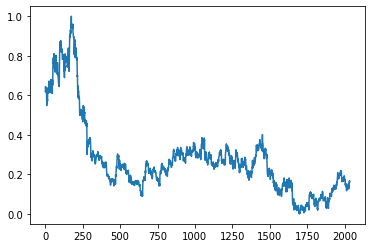

In [ ]:
import matplotlib.pyplot as plt
plt.plot(training_set_scaled)

In [ ]:
import numpy as np
training_set_scaled

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set = data.iloc[:, 1:2].values
training_set_scaled = sc.fit_transform(training_set)
print(training_set)

[[234.05]
 [234.55]
 [240.  ]
 ...
 [121.8 ]
 [120.3 ]
 [122.1 ]]


Splitting Dataset

In [ ]:
training_size=int(len(training_set)*0.65)
test_size=len(training_set)-training_size
train_data,test_data=training_set[0:training_size,:],training_set[training_size:len(training_set),:1]
training_size,test_size

(1322, 713)

In [ ]:
train_data

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [145.45],
       [144.1 ],
       [141.65]])

Reshaping

In [ ]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

RNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()  #first layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))  #second layer
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))  #third layer
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50)) #fourth layer
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))   #output layer
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 14s 120ms/step - loss: 0.0113
Epoch 2/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0030
Epoch 3/100
62/62 [==============================] - 7s 118ms/step - loss: 0.0031
Epoch 4/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0027
Epoch 5/100
62/62 [==============================] - 7s 118ms/step - loss: 0.0026
Epoch 6/100
62/62 [==============================] - 7s 118ms/step - loss: 0.0022
Epoch 7/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0020
Epoch 8/100
62/62 [==============================] - 7s 118ms/step - loss: 0.0023
Epoch 9/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0022
Epoch 10/100
62/62 [==============================] - 8s 121ms/step - loss: 0.0019
Epoch 11/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0019
Epoch 12/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0020
Epoch 13/100

Visualizing

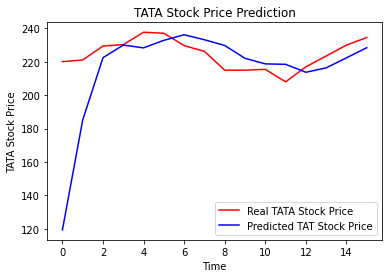

In [ ]:
dataset_test = pd.read_csv('tatatest.csv')
real_price_prediction = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((data['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.plot(real_price_prediction, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()